In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
df=pd.read_csv('AirPassengers.csv')
df=df.dropna()
print('Shape of data',df.shape)
df.rename(columns={'Month': 'Date', '#Passengers': 'count'}, inplace=True)

df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date' , inplace=True)

Shape of data (144, 2)


In [9]:
df.head()

,count
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [10]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

<Axes: xlabel='Date'>

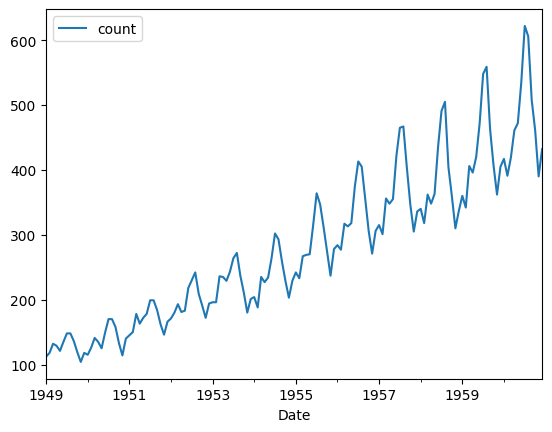

In [11]:
df.plot()

### Check Stationary 

<Axes: xlabel='Date'>

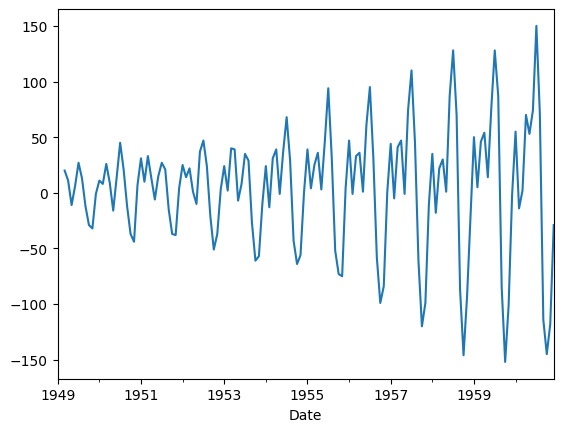

In [22]:
df['firstdiff']=df['count'].diff(1)
df['seconddiff']=df['count'].diff(2)
df['diff12']=df['count'].diff(12)

df['seconddiff'].plot()

In [23]:
def check_stationary(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
         
check_stationary(df['seconddiff'].dropna())

1. ADF :  -2.961695135555423
2. P-Value :  0.038629757676988535
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression: 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


### Plot ACF and PACF

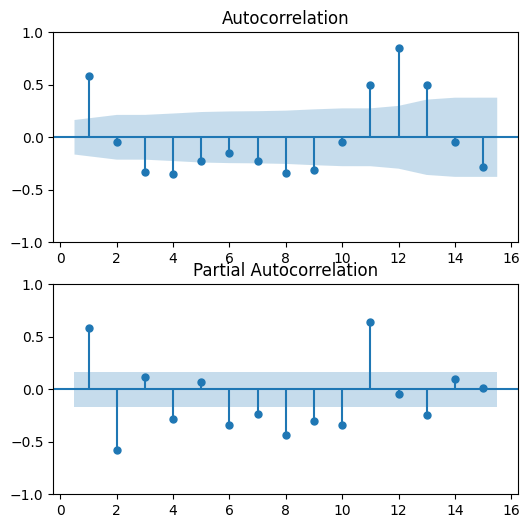

In [24]:
fig , (ax1 , ax2)=plt.subplots(2,1, figsize=(6,6))
plot_acf(df['seconddiff'].dropna() ,zero=False, lags=15, ax=ax1)
plot_pacf(df['seconddiff'].dropna() ,zero=False, lags=15, ax=ax2)
plt.show()

### Order of p , q

In [25]:
order_aic_bic=[]
for p in range(4):
    for q in range(4):
        try:
            model=ARIMA(df1['Sales'], order=(p,2,q))
            model_fit=model.fit()
            order_aic_bic.append([p,q,model_fit.aic , model_fit.bic])
        except:
            order_aic_bic.append([p, q , None , None])
order_df=pd.DataFrame(order_aic_bic , columns=['p', 'q', 'aic', 'bic'])
order_df.sort_values('aic')


C:\Users\Saba\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Saba\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Saba\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Saba\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  

,p,q,aic,bic
6,1,2,1395.599711,1403.977089
5,1,1,1395.995328,1402.278362
11,2,3,1396.091710,1408.657778
2,0,2,1396.259211,1402.542245
1,0,1,1396.793167,1400.981856
15,3,3,1397.138291,1411.798703
13,3,1,1397.403678,1407.875401
9,2,1,1397.486231,1405.863609
7,1,3,1397.830114,1408.301836
10,2,2,1398.342698,1408.814421


#### Order of p , q by auto_arima

In [26]:
import pmdarima as pm
from pmdarima import auto_arima

result=pm.auto_arima(df['count'], d=2 ,start_p=1 ,start_q=1 ,max_p=3 ,max_q=3,information_criterion='aic', trace=True , error_action='ignore')
result.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1450.596, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=1447.027, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=1440.078, Time=0.14 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=1437.879, Time=0.22 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.73 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=1439.877, Time=0.30 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 2.265 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(3, 2, 0)   Log Likelihood                -714.939
Date:                Thu, 22 Feb 2024   AIC                           1437.879
Time:                        17:36:53   BIC                           1449.702
Sample:                    01-01-1949   HQIC                          1442.683
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2995      0.100     -2.990      0.003      -0.496      -0.103
ar.L2         -0.2951      0.121     -2.431      0.015      -0.533      -0.057
ar.L3         -0.1765      0.082     -2.143      0.032      -0.338      -0.015
sigma2      1379.9854    144.746      9.534      0.000    1096.289    1663.682
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):                 7.16
Prob(Q):                              0.44   Prob(JB):                         0.03
Heteroskedasticity (H):               8.06   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Arima Model

#### Identify Train and Test

In [32]:
train=df[:round(len(df)*70/100)]
test=df[round(len(df)*70/100):]
test.tail()

,count,firstdiff,diff12,seconddiff
Date,,,,
1960-08-01,606,-16.0,47.0,71.0
1960-09-01,508,-98.0,45.0,-114.0
1960-10-01,461,-47.0,54.0,-145.0
1960-11-01,390,-71.0,28.0,-118.0
1960-12-01,432,42.0,27.0,-29.0


In [96]:
model=ARIMA(df['count'], order=(1,2,2))
model_fit=model.fit()
prediction=model_fit.get_prediction(start=test.index[0] , end=test.index[-1]).predicted_mean
df['arimapred']=prediction

futuredate=pd.DataFrame(pd.date_range(start='1960-12-01', end='1965-12-01' , freq='MS'), columns=['Date'])
futuredate.set_index('Date', inplace=True)
future=model_fit.get_forecast(steps=24).predicted_mean


C:\Users\Saba\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Saba\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Saba\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


#### Plot Forecast 

<Axes: xlabel='Date'>

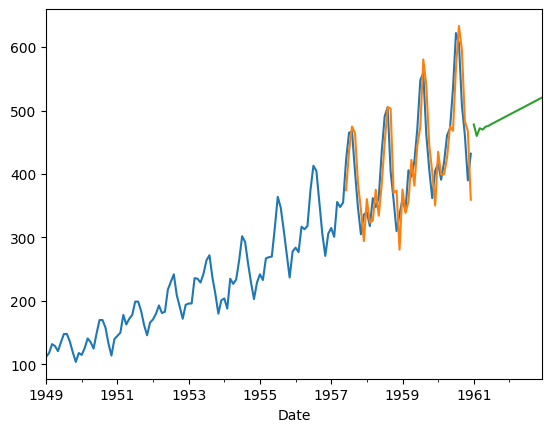

In [97]:
df['count'].plot()
df['arimapred'].plot()
future.plot()

<Axes: >

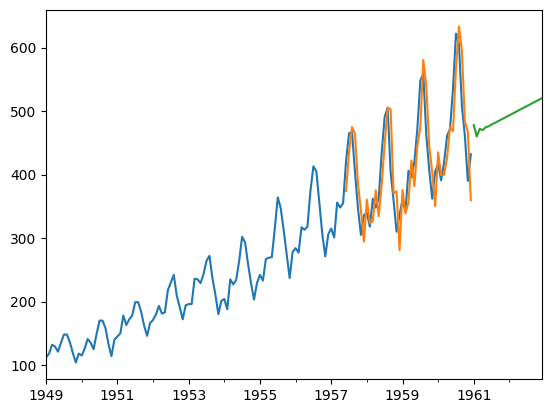

In [73]:
future_df = pd.DataFrame(future)
future_df.head()
new_df = pd.concat([df, future_df])
new_df['count'].plot(label='Actual')
new_df['arimapred'].plot(label='test_predict')
new_df['predicted_mean'].plot(label='Forecast')

#### Acuracy of Model

In [67]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test['count'], prediction))

53.46576958645317

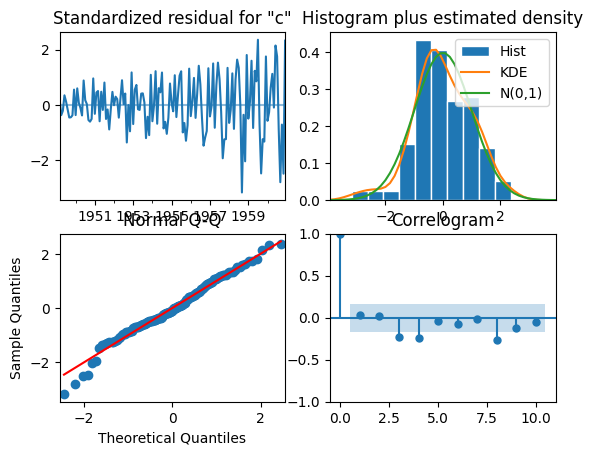

In [41]:
from sklearn.metrics import mean_squared_error
residual=model_fit.resid
mae=np.mean(np.abs(residual))
model_fit.plot_diagnostics()
plt.show()

### Seasonal Decompose

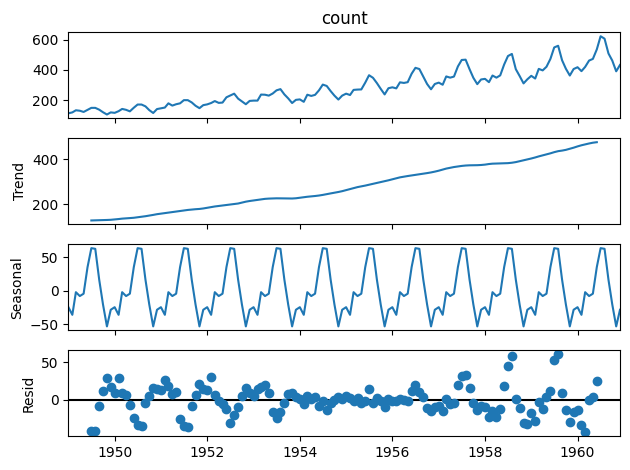

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_result=seasonal_decompose(df['count'] , period=12)
decomp_result.plot()
plt.show()

### Detrend

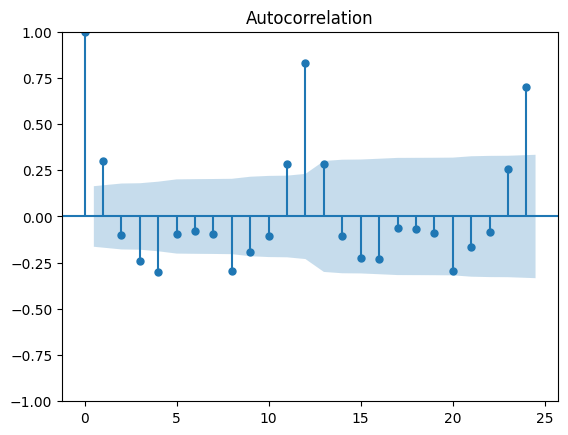

In [89]:
N=2

df1=df-df.rolling(N).mean()
df1.head()
plot_acf(df1['count'].dropna(), lags=24)
plt.show()

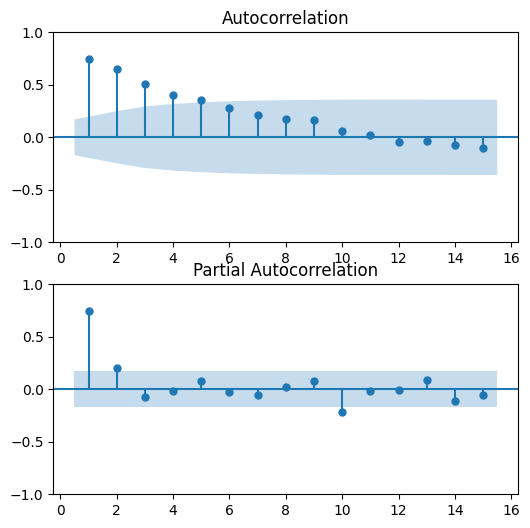

In [85]:
fig , (ax1 , ax2)=plt.subplots(2,1, figsize=(6,6))
plot_acf(df['diff12'].dropna() ,zero=False, lags=15, ax=ax1)
plot_pacf(df['diff12'].dropna() ,zero=False, lags=15, ax=ax2)
plt.show()

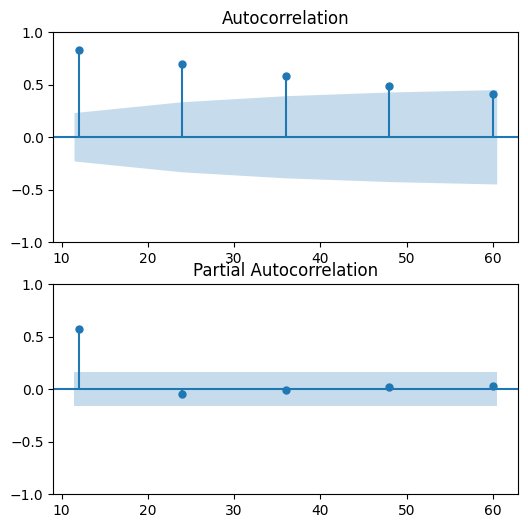

In [87]:
fig , (ax1 , ax2)=plt.subplots(2,1, figsize=(6,6))
plot_acf(df1['count'].dropna() ,zero=False, lags=[12,24,36,48,60], ax=ax1)
plot_pacf(df1['count'].dropna() ,zero=False, lags=[12,24,36,48,60], ax=ax2)
plt.show()

In [93]:
import pmdarima as pm
from pmdarima import auto_arima

result = pm.auto_arima(df1['count'].dropna(), d=2, start_p=1, start_q=1, max_p=3, max_q=3,
                        seasonal=True, m=12, D=2, start_P=1, start_Q=1,
                        max_P=2, max_Q=2, information_criterion='aic',
                        trace=True, error_action='ignore')
result.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(1,2,1)[12]             : AIC=inf, Time=2.22 sec
 ARIMA(0,2,0)(0,2,0)[12]             : AIC=1106.123, Time=0.10 sec
 ARIMA(1,2,0)(1,2,0)[12]             : AIC=959.190, Time=0.55 sec
 ARIMA(0,2,1)(0,2,1)[12]             : AIC=inf, Time=1.16 sec
 ARIMA(1,2,0)(0,2,0)[12]             : AIC=983.225, Time=0.14 sec
 ARIMA(1,2,0)(2,2,0)[12]             : AIC=957.505, Time=0.97 sec
 ARIMA(1,2,0)(2,2,1)[12]             : AIC=inf, Time=4.75 sec
 ARIMA(1,2,0)(1,2,1)[12]             : AIC=inf, Time=2.31 sec
 ARIMA(0,2,0)(2,2,0)[12]             : AIC=1068.044, Time=0.82 sec
 ARIMA(2,2,0)(2,2,0)[12]             : AIC=908.994, Time=1.17 sec
 ARIMA(2,2,0)(1,2,0)[12]             : AIC=917.365, Time=0.56 sec
 ARIMA(2,2,0)(2,2,1)[12]             : AIC=inf, Time=5.20 sec
 ARIMA(2,2,0)(1,2,1)[12]             : AIC=inf, Time=2.23 sec
 ARIMA(3,2,0)(2,2,0)[12]             : AIC=897.344, Time=1.53 sec
 ARIMA(3,2,0)(1,2,0)[12]             : AIC=905.399, Tim

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  143
Model:             SARIMAX(3, 2, 0)x(2, 2, 0, 12)   Log Likelihood                -442.672
Date:                            Thu, 22 Feb 2024   AIC                            897.344
Time:                                    19:25:36   BIC                            913.917
Sample:                                02-01-1949   HQIC                           904.072
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4722      0.096    -15.322      0.000      -1.661      -1.284
ar.L2         -1.0537      0.135     -7.811      0.000      -1.318      -0.789
ar.L3         -0.3483      0.084     -4.144      0.000      -0.513      -0.184
ar.S.L12      -0.8621      0.111     -7.761      0.000      -1.080      -0.644
ar.S.L24      -0.3685      0.125     -2.946      0.003      -0.614      -0.123
sigma2       102.3784      9.803     10.444      0.000      83.165     121.592
===================================================================================
Ljung-Box (L1) (Q):                   1.83   Jarque-Bera (JB):                45.42
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               1.81   Skew:                             0.60
Prob(H) (two-sided):                  0.07   Kurtosis:                         5.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [111]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model2=SARIMAX(df['count'], order=(1,2,2), seasonal_order=(1,2,2,12) )
model_fit2=model2.fit()
prediction2=model_fit2.get_prediction(start=test.index[0] , end=test.index[-1]).predicted_mean
df['sarimapred']=prediction2

futuredate2=pd.DataFrame(pd.date_range(start='1960-12-01', end='1965-12-01' , freq='MS'), columns=['Date'])
futuredate2.set_index('Date', inplace=True)
future2=model_fit2.get_forecast(steps=24).predicted_mean


C:\Users\Saba\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Saba\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Saba\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Saba\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Date'>

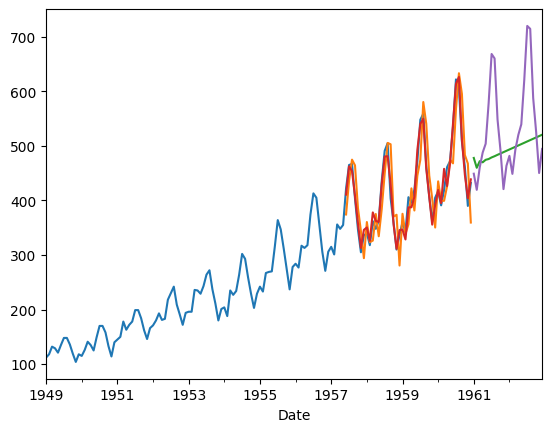

In [112]:
df['count'].plot(label='Actual')
df['arimapred'].plot(label='Arima')
future.plot(label='Future_Arima')
df['sarimapred'].plot(label='Sarima')
future2.plot(label='Future_Sarima')


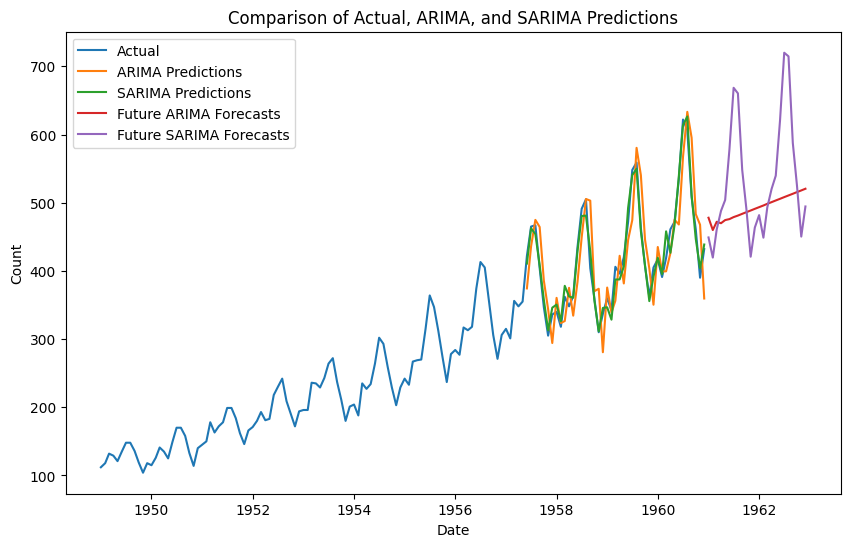

In [105]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot actual data
plt.plot(df.index, df['count'], label='Actual')

# Plot ARIMA predictions
plt.plot(df.index, df['arimapred'], label='ARIMA Predictions')

# Plot SARIMA predictions
plt.plot(df.index, df['sarimapred'], label='SARIMA Predictions')

# Plot future forecasts from ARIMA
plt.plot(future.index, future, label='Future ARIMA Forecasts')

# Plot future forecasts from SARIMA
plt.plot(future2.index, future2, label='Future SARIMA Forecasts')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Comparison of Actual, ARIMA, and SARIMA Predictions')
plt.legend()

# Show plot
plt.show()

In [110]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test['count'], prediction2))

18.179804268654276